# Group - 8

# Motion Capture Hand Postures

# Presentation of the test results

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from mlxtend.plotting import plot_decision_regions
from sklearn.dummy import DummyClassifier
from scipy.stats import uniform, randint
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data to dataframe using pandas
df = pd.read_csv('Group_8_data_cleaned.csv')

In [3]:
# Class Ranges from 1 to 5 with 1=Fist(with thumb out), 2=Stop(hand flat), 3=Point1(point with pointer finger), 4=Point2(point with pointer and middle fingers), 5=Grab(fingers curled as if to grab)
Class ={1:'Fist',2:'Stop',3:'Point1',4:'Point2',5:'Grab'}
df["Class"].value_counts().rename(index=Class)

Point1    16344
Fist      16265
Grab      15733
Stop      14978
Point2    14775
Name: Class, dtype: int64

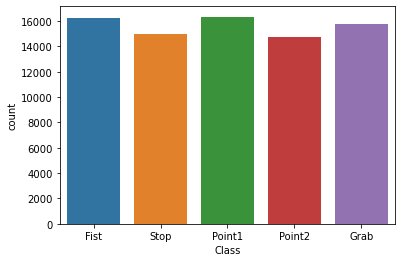

In [4]:
axis = sns.countplot(df['Class'])
axis.set(xticklabels=Class.values())
plt.show()

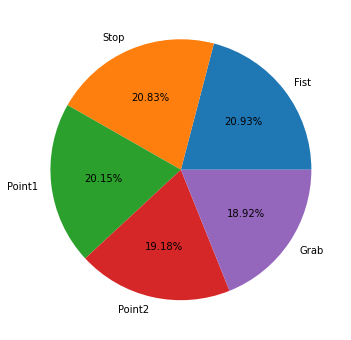

In [5]:
plt.figure(figsize=(8,6))
plt.pie(df['Class'].value_counts(),labels=Class.values(),autopct='%1.2f%%')
plt.show()

In [6]:
# Finding the correlation
df.corr()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10
Class,1.000000,-0.030714,0.079492,0.081539,0.051954,-0.011153,0.144365,0.090015,-0.052879,0.169339,...,-0.431328,0.110273,-0.102678,-0.396517,-0.067164,-0.057630,-0.393111,0.261075,0.603951,-0.568864
User,-0.030714,1.000000,-0.013231,0.070051,0.192333,-0.042888,0.041542,0.183486,-0.059910,0.000721,...,0.062294,-0.044811,-0.024825,0.024816,-0.032268,-0.061731,-0.058102,0.035874,-0.108520,-0.036324
X0,0.079492,-0.013231,1.000000,-0.288949,-0.240624,0.124712,-0.010227,0.032423,0.106485,-0.013941,...,-0.068560,0.003422,-0.080222,-0.028358,-0.059965,-0.033867,-0.034120,0.036841,0.066446,-0.038211
Y0,0.081539,0.070051,-0.288949,1.000000,0.555375,-0.002696,0.128295,0.227348,0.004414,0.077050,...,-0.072656,0.150770,-0.156867,-0.149771,0.098634,-0.165979,-0.122814,0.056732,-0.058891,-0.080287
Z0,0.051954,0.192333,-0.240624,0.555375,1.000000,0.014514,0.211108,0.464517,0.008465,0.150829,...,-0.019553,0.173141,-0.182350,-0.129421,0.159868,-0.185470,-0.163213,0.080115,-0.102461,-0.113697
X1,-0.011153,-0.042888,0.124712,-0.002696,0.014514,1.000000,-0.296224,-0.264209,0.139583,-0.052785,...,-0.039657,-0.012231,-0.099358,-0.004662,-0.067531,-0.061544,0.001212,-0.007722,0.025880,0.021817
Y1,0.144365,0.041542,-0.010227,0.128295,0.211108,-0.296224,1.000000,0.575463,-0.028562,0.104067,...,-0.069511,0.151247,-0.116476,-0.160806,0.109433,-0.122891,-0.134045,0.105224,-0.009098,-0.119482
Z1,0.090015,0.183486,0.032423,0.227348,0.464517,-0.264209,0.575463,1.000000,-0.009361,0.176062,...,-0.007667,0.200909,-0.143638,-0.125252,0.167363,-0.142913,-0.157053,0.114214,-0.073331,-0.127608
X2,-0.052879,-0.059910,0.106485,0.004414,0.008465,0.139583,-0.028562,-0.009361,1.000000,-0.318468,...,-0.017741,-0.015018,-0.104503,0.009064,-0.061802,-0.093003,0.005331,-0.031895,-0.005042,0.048540
Y2,0.169339,0.000721,-0.013941,0.077050,0.150829,-0.052785,0.104067,0.176062,-0.318468,1.000000,...,-0.041489,0.162980,-0.085041,-0.172913,0.117642,-0.104867,-0.133687,0.137774,-0.002764,-0.133651


<AxesSubplot:>

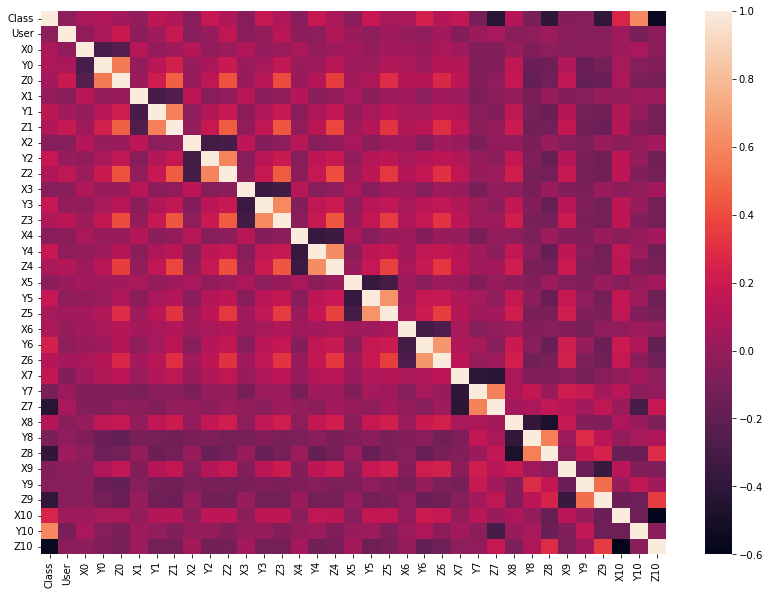

In [7]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr())

In [8]:
X=df.drop(['Class', 'User'],axis=1)
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Scaling the data using Standard Scaler

In [9]:
# Scaling the data using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Taking the empty lists to get the accuracy, precision, recall and f1_score

In [10]:
accuracy = []
precision=[]
recall=[]
f1_score=[]

# A comparison with a naive classification technique (baseline)

In [11]:
from sklearn.dummy import DummyClassifier

In [12]:
baseline_clf = DummyClassifier(strategy="most_frequent")

In [13]:
baseline_clf.fit(X_train_scaled, y_train)

DummyClassifier(strategy='most_frequent')

In [14]:
baseline_pred = baseline_clf.predict(X_test_scaled)

In [15]:
baseline_accuracy = np.mean(baseline_pred == y_test)
print("Baseline accuracy:", baseline_accuracy)
accuracy.append(baseline_accuracy)

Baseline accuracy: 0.2071791369670067


In [16]:
cl_report_naive = classification_report(y_test, baseline_pred, output_dict = True)
precision.append(cl_report_naive['weighted avg']['precision'])
recall.append(cl_report_naive['weighted avg']['recall'])
f1_score.append(cl_report_naive['weighted avg']['f1-score'])
print(classification_report(y_test, baseline_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      4898
           2       0.00      0.00      0.00      4485
           3       0.21      1.00      0.34      4854
           4       0.00      0.00      0.00      4496
           5       0.00      0.00      0.00      4696

    accuracy                           0.21     23429
   macro avg       0.04      0.20      0.07     23429
weighted avg       0.04      0.21      0.07     23429



In [17]:
conf_matrix_baseline = confusion_matrix(y_test, baseline_pred)
conf_matrix_baseline

array([[   0,    0, 4898,    0,    0],
       [   0,    0, 4485,    0,    0],
       [   0,    0, 4854,    0,    0],
       [   0,    0, 4496,    0,    0],
       [   0,    0, 4696,    0,    0]], dtype=int64)

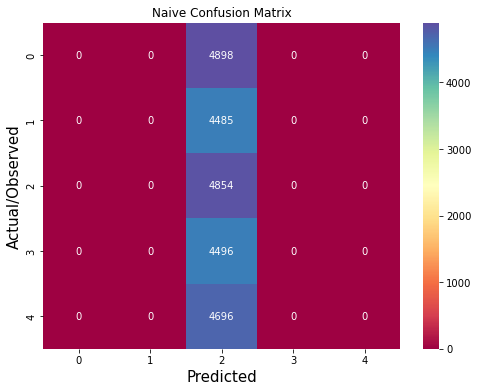

In [18]:
plt.figure(figsize = (8,6))

sns.heatmap(conf_matrix_baseline, 
            annot=True, 
            cmap="Spectral", fmt = "g")
plt.title("Naive Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

# Training the models using the best hyper parameters that we obtained in all the 4 models and predicting the test data.

# Linear Classifier using the best hyper parameters

In [19]:
from sklearn.linear_model import SGDClassifier

In [20]:
SGD_linear = SGDClassifier(loss='hinge', alpha= 0.1, learning_rate='optimal', random_state=0)

In [21]:
SGD_linear.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.1, random_state=0)

In [22]:
y_pred_linear = SGD_linear.predict(X_test_scaled)
linear_acc = accuracy_score(y_test, y_pred_linear)
accuracy.append(linear_acc)
print("Accuracy of Linear model for test data is",linear_acc)

Accuracy of Linear model for test data is 0.9518545392462333


In [23]:
cl_report_linear = classification_report(y_test, y_pred_linear, output_dict=True)
precision.append(cl_report_linear['weighted avg']['precision'])
recall.append(cl_report_linear['weighted avg']['recall'])
f1_score.append(cl_report_linear['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           1       0.97      0.99      0.98      4898
           2       0.90      0.95      0.93      4485
           3       0.97      0.96      0.96      4854
           4       0.95      0.97      0.96      4496
           5       0.97      0.88      0.92      4696

    accuracy                           0.95     23429
   macro avg       0.95      0.95      0.95     23429
weighted avg       0.95      0.95      0.95     23429



In [24]:
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
conf_matrix_linear

array([[4872,   15,   10,    0,    1],
       [  54, 4277,   39,   49,   66],
       [  29,   91, 4644,   27,   63],
       [   0,   90,   40, 4366,    0],
       [  44,  283,   74,  153, 4142]], dtype=int64)

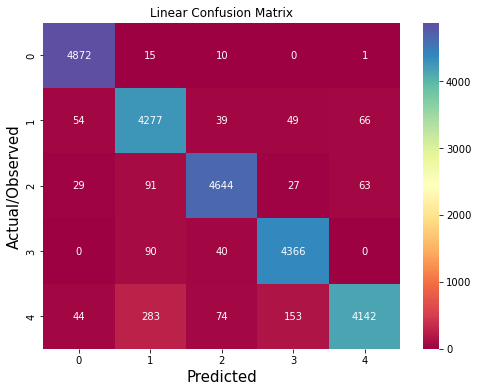

In [25]:
plt.figure(figsize = (8,6))

sns.heatmap(conf_matrix_linear, 
            annot=True, 
            cmap="Spectral", fmt = "g")
plt.title("Linear Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

# KNN using the best hyper parameters

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#Train Model and Predict
knn = KNeighborsClassifier(n_neighbors= 5)

In [28]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [29]:
y_pred_knn = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, y_pred_knn)
accuracy.append(knn_acc)
print("Accuracy of knn model for test data is",knn_acc)

Accuracy of knn model for test data is 0.9790430662853729


In [30]:
cl_report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
precision.append(cl_report_knn['weighted avg']['precision'])
recall.append(cl_report_knn['weighted avg']['recall'])
f1_score.append(cl_report_knn['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00      4898
           2       0.96      0.98      0.97      4485
           3       0.96      0.99      0.98      4854
           4       0.99      0.98      0.98      4496
           5       0.99      0.95      0.97      4696

    accuracy                           0.98     23429
   macro avg       0.98      0.98      0.98     23429
weighted avg       0.98      0.98      0.98     23429



In [31]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_knn

array([[4881,   17,    0,    0,    0],
       [  20, 4382,   46,    7,   30],
       [   6,    0, 4811,   36,    1],
       [   1,    0,  104, 4391,    0],
       [   5,  183,   25,   10, 4473]], dtype=int64)

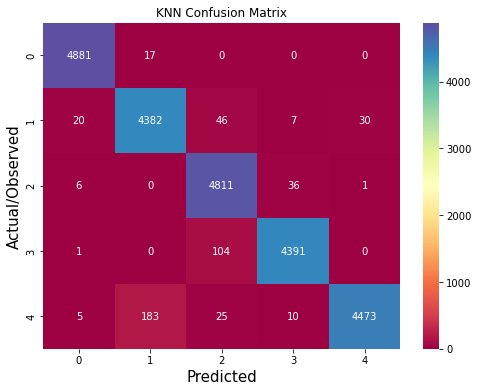

In [32]:
plt.figure(figsize = (8,6))

sns.heatmap(conf_matrix_knn,
            annot=True, 
            cmap="Spectral", fmt = "g")
plt.title("KNN Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

# Random Forest Classifier using the best hyper parameters

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc=RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'auto', n_estimators= 201, random_state=42)

In [35]:
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=8, n_estimators=201, random_state=42)

In [36]:
y_pred_rfc = rfc.predict(X_test_scaled)
acc_rfc = accuracy_score(y_test,y_pred_rfc)
accuracy.append(acc_rfc)

In [37]:
print("Accuracy for Random Forest for test data",acc_rfc)

Accuracy for Random Forest for test data 0.9938537709676043


In [38]:
cl_report_rfc = classification_report(y_test, y_pred_rfc, output_dict=True)
precision.append(cl_report_rfc['weighted avg']['precision'])
recall.append(cl_report_rfc['weighted avg']['recall'])
f1_score.append(cl_report_rfc['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4898
           2       0.98      0.99      0.98      4485
           3       1.00      1.00      1.00      4854
           4       1.00      1.00      1.00      4496
           5       0.99      0.98      0.99      4696

    accuracy                           0.99     23429
   macro avg       0.99      0.99      0.99     23429
weighted avg       0.99      0.99      0.99     23429



In [39]:
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
conf_matrix_rfc

array([[4881,   16,    0,    0,    1],
       [   0, 4455,    0,    0,   30],
       [   0,    0, 4854,    0,    0],
       [   0,    0,    0, 4496,    0],
       [   0,   97,    0,    0, 4599]], dtype=int64)

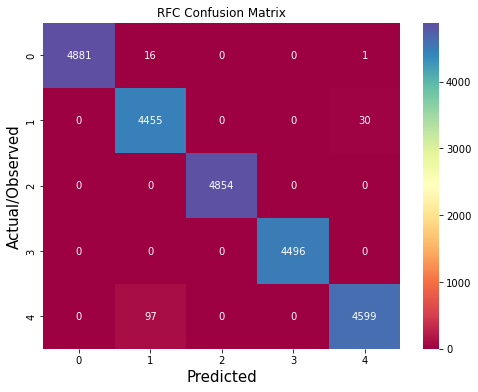

In [40]:
plt.figure(figsize = (8,6))

sns.heatmap(conf_matrix_rfc, 
            annot=True, 
            cmap="Spectral", fmt = "g")
plt.title("RFC Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

# Decision Tree using the best hyper parameters

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dec_tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 1, min_samples_split= 8, random_state=42)
dec_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=8, random_state=42)

In [43]:
y_pred_tree = dec_tree.predict(X_test_scaled)
acc_tree = accuracy_score(y_test, y_pred_tree)
accuracy.append(acc_tree)

In [44]:
print("Best Accuracy for Decision Tree for test data",acc_tree)

Best Accuracy for Decision Tree for test data 0.9911647957659311


In [45]:
cl_report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
precision.append(cl_report_tree['weighted avg']['precision'])
recall.append(cl_report_tree['weighted avg']['recall'])
f1_score.append(cl_report_tree['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4898
           2       0.97      0.99      0.98      4485
           3       1.00      1.00      1.00      4854
           4       1.00      1.00      1.00      4496
           5       0.99      0.97      0.98      4696

    accuracy                           0.99     23429
   macro avg       0.99      0.99      0.99     23429
weighted avg       0.99      0.99      0.99     23429



In [46]:
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
conf_matrix_tree

array([[4882,   15,    0,    0,    1],
       [   1, 4423,    0,    0,   61],
       [   0,    0, 4854,    0,    0],
       [   0,    0,    0, 4496,    0],
       [   1,  128,    0,    0, 4567]], dtype=int64)

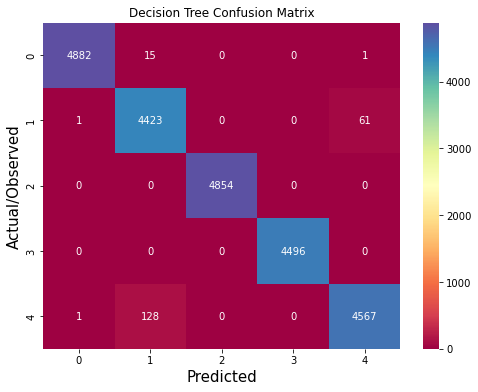

In [47]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_tree, 
            annot=True, 
            cmap="Spectral", fmt = "g")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

# Part - 3

# Support Vector Linear Classifier using the best hyper parameters

In [48]:
from sklearn.svm import LinearSVC

In [49]:
clf_svc_lin = LinearSVC(C= 0.01)
clf_svc_lin.fit(X_train_scaled, y_train)

LinearSVC(C=0.01)

In [50]:
# Predict target values using testing data
y_pred_svc_lin = clf_svc_lin.predict(X_test_scaled)

In [51]:
# Calculate accuracy of SVM classifier
acc_svlin = accuracy_score(y_test, y_pred_svc_lin)
accuracy.append(acc_svlin)
print("Accuracy:", acc_svlin)

Accuracy: 0.9646165009176662


In [52]:
cl_report_svlin = classification_report(y_test, y_pred_svc_lin, output_dict=True)
precision.append(cl_report_svlin['weighted avg']['precision'])
recall.append(cl_report_svlin['weighted avg']['recall'])
f1_score.append(cl_report_svlin['weighted avg']['f1-score'])

In [53]:
print(classification_report(y_test, y_pred_svc_lin))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99      4898
           2       0.93      0.95      0.94      4485
           3       0.96      0.98      0.97      4854
           4       0.98      0.99      0.98      4496
           5       0.97      0.91      0.94      4696

    accuracy                           0.96     23429
   macro avg       0.96      0.96      0.96     23429
weighted avg       0.96      0.96      0.96     23429



In [54]:
conf_matrix_svc_lin = confusion_matrix(y_test, y_pred_svc_lin)
conf_matrix_svc_lin

array([[4882,   15,    0,    0,    1],
       [  25, 4253,   56,   35,  116],
       [   6,   53, 4758,    0,   37],
       [   0,   18,   31, 4447,    0],
       [  16,  222,  123,   75, 4260]], dtype=int64)

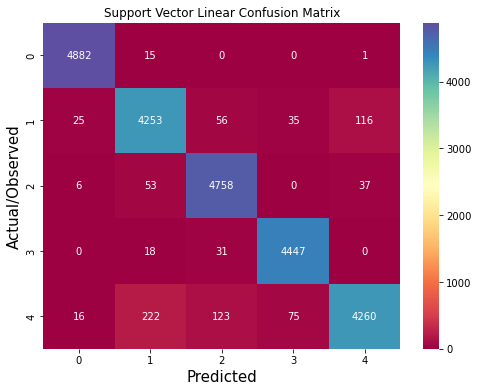

In [55]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_svc_lin, 
            annot=True, 
            cmap="Spectral", fmt = "g")
plt.title("Support Vector Linear Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

# Support Vector Non-Linear Classifier using the best hyper parameters

In [56]:
from sklearn.svm import SVC

In [57]:
clf_svc = SVC(C=100, gamma=0.01, kernel='poly')
clf_svc.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.01, kernel='poly')

In [58]:
# Predict target values using testing data
y_pred_svc = clf_svc.predict(X_test_scaled)

In [59]:
# Calculate accuracy of SVM classifier
acc_svc = accuracy_score(y_test, y_pred_svc)
accuracy.append(acc_svc)
print("Accuracy:", acc_svc)

Accuracy: 0.9945793674505954


In [60]:
cl_report_svc = classification_report(y_test, y_pred_svc, output_dict=True)
precision.append(cl_report_svc['weighted avg']['precision'])
recall.append(cl_report_svc['weighted avg']['recall'])
f1_score.append(cl_report_svc['weighted avg']['f1-score'])

In [61]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4898
           2       0.99      0.99      0.99      4485
           3       1.00      1.00      1.00      4854
           4       1.00      1.00      1.00      4496
           5       0.99      0.99      0.99      4696

    accuracy                           0.99     23429
   macro avg       0.99      0.99      0.99     23429
weighted avg       0.99      0.99      0.99     23429



In [62]:
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
conf_matrix_svc

array([[4881,   16,    0,    1,    0],
       [   5, 4432,    7,    2,   39],
       [   1,    0, 4853,    0,    0],
       [   0,    0,    1, 4495,    0],
       [   2,   42,    7,    4, 4641]], dtype=int64)

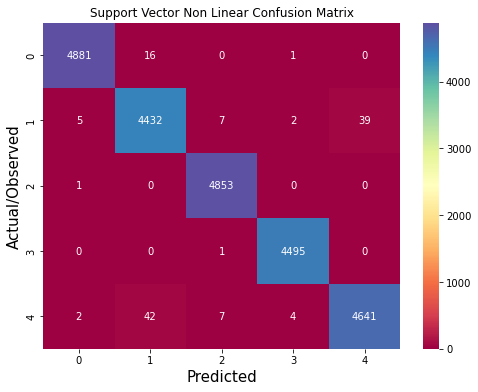

In [63]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_svc, 
            annot=True, 
            cmap="Spectral", fmt = "g")
plt.title("Support Vector Non Linear Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

# MLP - Multi Layer Perceptron Classifier using the best hyper parameters

In [64]:
# Importing the deep learning model
from sklearn.neural_network import MLPClassifier

In [65]:
# Taking MLP model
mlp = MLPClassifier(learning_rate= 'adaptive', hidden_layer_sizes= 1000, alpha= 0.001)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=1000, learning_rate='adaptive')

In [66]:
# finding accuracy for the random model
y_pred_mlp  = mlp.predict(X_test_scaled)

In [67]:
acc_mlp = accuracy_score(y_test,y_pred_mlp)
accuracy.append(acc_mlp)
print(f" The testing data accuracy for the MLP model is {acc_mlp}")

 The testing data accuracy for the MLP model is 0.9969268854838021


In [68]:
cl_report_mlp = classification_report(y_test, y_pred_mlp, output_dict=True)
precision.append(cl_report_mlp['weighted avg']['precision'])
recall.append(cl_report_mlp['weighted avg']['recall'])
f1_score.append(cl_report_mlp['weighted avg']['f1-score'])

In [69]:
print(classification_report(y_test,y_pred_mlp))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4898
           2       0.99      0.99      0.99      4485
           3       1.00      1.00      1.00      4854
           4       1.00      1.00      1.00      4496
           5       0.99      0.99      0.99      4696

    accuracy                           1.00     23429
   macro avg       1.00      1.00      1.00     23429
weighted avg       1.00      1.00      1.00     23429



In [70]:
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
conf_matrix_mlp

array([[4882,   15,    0,    0,    1],
       [   1, 4457,    1,    1,   25],
       [   0,    0, 4854,    0,    0],
       [   0,    0,    0, 4496,    0],
       [   0,   27,    1,    0, 4668]], dtype=int64)

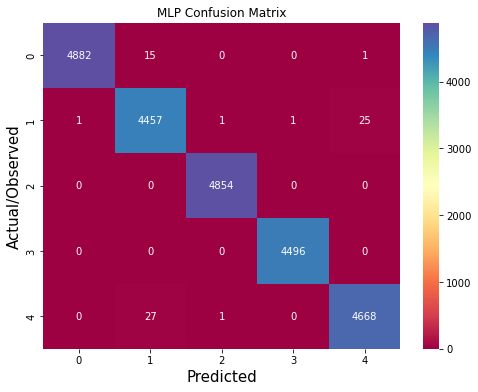

In [71]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_mlp, 
            annot=True, 
            cmap="Spectral", fmt = "g")
plt.title("MLP Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

# Best Models by using the variable selection using LASSO

# MLP using variable selection with Lasso

In [72]:
features_lasso = ['Y2', 'Y3', 'Y4', 'Y6', 'Z7', 'Z8', 'X9', 'Z9', 'Y10', 'Z10']

In [73]:
X_best = df[features_lasso]

In [74]:
X_train_b, X_test_b, y_train, y_test = train_test_split(X_best, y, test_size=0.3, random_state=42)

In [75]:
X_train_b = scaler.fit_transform(X_train_b)
X_test_b = scaler.transform(X_test_b)

In [76]:
rfc_lasso = RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'auto', n_estimators= 201, random_state=42)

In [77]:
rfc_lasso.fit(X_train_b, y_train)

RandomForestClassifier(max_depth=8, n_estimators=201, random_state=42)

In [79]:
y_pred_rfc_lasso = rfc_lasso.predict(X_test_b)

In [80]:
acc_rfc_lasso = accuracy_score(y_test, y_pred_rfc_lasso)
accuracy.append(acc_rfc_lasso)
print(f" The testing data accuracy for the MLP model is {acc_rfc_lasso}")

 The testing data accuracy for the MLP model is 0.9812198557343463


In [81]:
cl_report_rfc_lasso = classification_report(y_test, y_pred_rfc_lasso, output_dict=True)
precision.append(cl_report_rfc_lasso['weighted avg']['precision'])
recall.append(cl_report_rfc_lasso['weighted avg']['recall'])
f1_score.append(cl_report_rfc_lasso['weighted avg']['f1-score'])

In [82]:
print(classification_report(y_test, y_pred_rfc_lasso))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4898
           2       0.92      0.98      0.95      4485
           3       1.00      1.00      1.00      4854
           4       1.00      1.00      1.00      4496
           5       0.98      0.92      0.95      4696

    accuracy                           0.98     23429
   macro avg       0.98      0.98      0.98     23429
weighted avg       0.98      0.98      0.98     23429



In [83]:
# getting the confusion matrix on test data based on true positive values
conf_matrix_rfc_lasso = confusion_matrix(y_test, y_pred_rfc_lasso)
conf_matrix_rfc_lasso

array([[4881,   16,    0,    0,    1],
       [   0, 4417,    0,    0,   68],
       [   0,    0, 4854,    0,    0],
       [   0,    0,    0, 4496,    0],
       [   0,  355,    0,    0, 4341]], dtype=int64)

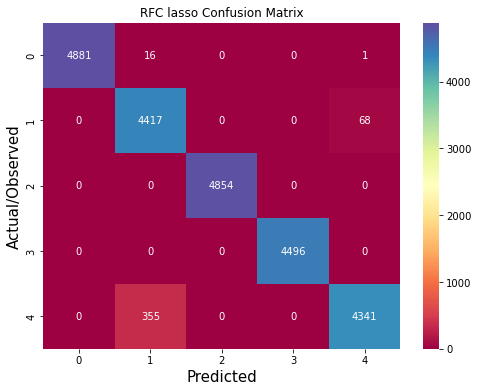

In [127]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_rfc_lasso, 
            annot=True, 
            cmap="Spectral", fmt = "g")
plt.title("RFC lasso Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

# MLP using variable selection with Lasso

In [85]:
mlp_lasso = MLPClassifier(learning_rate= 'adaptive', hidden_layer_sizes= 1000, alpha= 0.001)
mlp_lasso.fit(X_train_b, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=1000, learning_rate='adaptive')

In [87]:
y_pred_mlp_lasso = mlp_lasso.predict(X_test_b)

In [88]:
acc_mlp_lasso = accuracy_score(y_test, y_pred_mlp_lasso)
accuracy.append(acc_mlp_lasso)
print(f" The testing data accuracy for the MLP model is {acc_mlp_lasso}")

 The testing data accuracy for the MLP model is 0.9827137308463869


In [89]:
cl_report_mlp_lasso = classification_report(y_test, y_pred_mlp_lasso, output_dict=True)
precision.append(cl_report_mlp_lasso['weighted avg']['precision'])
recall.append(cl_report_mlp_lasso['weighted avg']['recall'])
f1_score.append(cl_report_mlp_lasso['weighted avg']['f1-score'])

In [90]:
print(classification_report(y_test, y_pred_mlp_lasso))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4898
           2       0.95      0.96      0.96      4485
           3       1.00      1.00      1.00      4854
           4       1.00      1.00      1.00      4496
           5       0.96      0.96      0.96      4696

    accuracy                           0.98     23429
   macro avg       0.98      0.98      0.98     23429
weighted avg       0.98      0.98      0.98     23429



In [91]:
# getting the confusion matrix on test data based on true positive values
conf_matrix_mlp_lasso = confusion_matrix(y_test, y_pred_mlp_lasso)
conf_matrix_mlp_lasso

array([[4881,   15,    0,    0,    2],
       [   2, 4307,    0,    0,  176],
       [   0,    0, 4854,    0,    0],
       [   0,    0,    0, 4496,    0],
       [   0,  207,    2,    1, 4486]], dtype=int64)

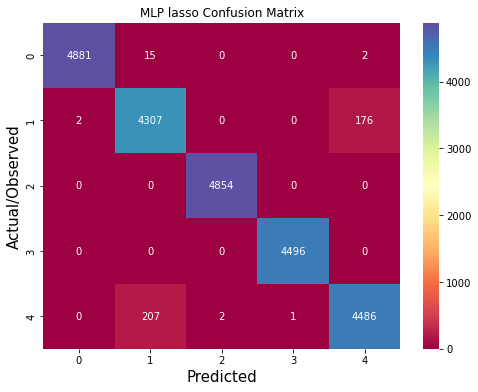

In [126]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_mlp_lasso, 
            annot=True, 
            cmap="Spectral", fmt = "g")
plt.title("MLP lasso Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

# Best Models by using the variable selection as Bidirectional elimination as the wrapper method

# RFC using Bidirectional features

In [93]:
features_wrapper = ['X0','Y0','Z0','X1','Y1','Z1','X2','X3','Z4','Z8','X9','Y9','Z9','X10','Y10','Z10']

In [94]:
X_w = df[features_wrapper]

In [95]:
X_train_w, X_test_w, y_train, y_test = train_test_split(X_w, y, test_size=0.3, random_state=42)

In [96]:
X_train_w = scaler.fit_transform(X_train_w)
X_test_w = scaler.transform(X_test_w)

In [97]:
rfc_w = RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'auto', n_estimators= 201, random_state=42)

In [98]:
rfc_w.fit(X_train_w, y_train)

RandomForestClassifier(max_depth=8, n_estimators=201, random_state=42)

In [99]:
y_pred_rfc_w = rfc_w.predict(X_test_w)

In [100]:
acc_rfc_w = accuracy_score(y_test, y_pred_rfc_w)
accuracy.append(acc_rfc_w)
print(f" The testing data accuracy for the MLP model is {acc_rfc_w}")

 The testing data accuracy for the MLP model is 0.9912074779119894


In [101]:
cl_report_rfc_w = classification_report(y_test, y_pred_rfc_w, output_dict=True)
precision.append(cl_report_rfc_w['weighted avg']['precision'])
recall.append(cl_report_rfc_w['weighted avg']['recall'])
f1_score.append(cl_report_rfc_w['weighted avg']['f1-score'])

In [102]:
print(classification_report(y_test, y_pred_rfc_w))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4898
           2       0.97      0.99      0.98      4485
           3       1.00      1.00      1.00      4854
           4       1.00      1.00      1.00      4496
           5       0.99      0.97      0.98      4696

    accuracy                           0.99     23429
   macro avg       0.99      0.99      0.99     23429
weighted avg       0.99      0.99      0.99     23429



In [103]:
# getting the confusion matrix on test data based on true positive values
conf_matrix_rfc_w = confusion_matrix(y_test, y_pred_rfc_w)
conf_matrix_rfc_w

array([[4881,   16,    0,    0,    1],
       [   0, 4441,    0,    0,   44],
       [   0,    0, 4854,    0,    0],
       [   0,    0,    0, 4496,    0],
       [   0,  145,    0,    0, 4551]], dtype=int64)

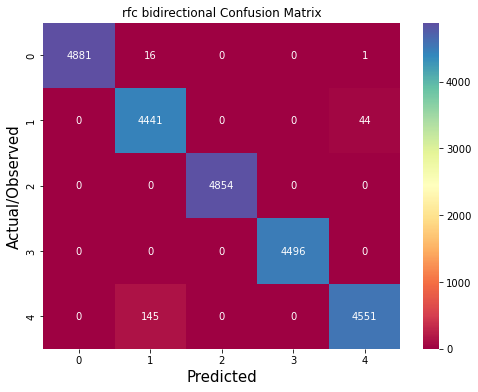

In [125]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_rfc_w, 
            annot=True, 
            cmap="Spectral", fmt = "g")
plt.title("rfc bidirectional Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

# MLP using Bidirectional features

In [105]:
mlp_w = MLPClassifier(learning_rate= 'adaptive', hidden_layer_sizes= 1000, alpha= 0.001)
mlp_w.fit(X_train_w, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=1000, learning_rate='adaptive')

In [106]:
y_pred_mlp_w = mlp_w.predict(X_test_w)

In [107]:
acc_mlp_w = accuracy_score(y_test, y_pred_mlp_w)
accuracy.append(acc_mlp_w)
print(f" The testing data accuracy for the MLP model is {acc_mlp_w}")

 The testing data accuracy for the MLP model is 0.9936403602373127


In [108]:
cl_report_mlp_w = classification_report(y_test, y_pred_mlp_w, output_dict=True)
precision.append(cl_report_mlp_w['weighted avg']['precision'])
recall.append(cl_report_mlp_w['weighted avg']['recall'])
f1_score.append(cl_report_mlp_w['weighted avg']['f1-score'])

In [109]:
print(classification_report(y_test, y_pred_mlp_w))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4898
           2       0.98      0.98      0.98      4485
           3       1.00      1.00      1.00      4854
           4       1.00      1.00      1.00      4496
           5       0.98      0.99      0.99      4696

    accuracy                           0.99     23429
   macro avg       0.99      0.99      0.99     23429
weighted avg       0.99      0.99      0.99     23429



In [110]:
# getting the confusion matrix on test data based on true positive values
conf_matrix_mlp_w = confusion_matrix(y_test, y_pred_mlp_w)
conf_matrix_mlp_w

array([[4882,   14,    0,    0,    2],
       [   6, 4409,    0,    1,   69],
       [   0,    0, 4854,    0,    0],
       [   0,    0,    0, 4496,    0],
       [   0,   57,    0,    0, 4639]], dtype=int64)

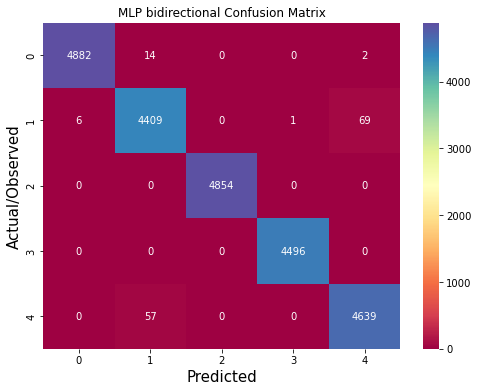

In [124]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_mlp_w, 
            annot=True, 
            cmap="Spectral", fmt = "g")
plt.title("MLP bidirectional Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

# Plotting the accuracy graph for all the models

In [112]:
accuracy

[0.2071791369670067,
 0.9518545392462333,
 0.9790430662853729,
 0.9938537709676043,
 0.9911647957659311,
 0.9646165009176662,
 0.9945793674505954,
 0.9969268854838021,
 0.9812198557343463,
 0.9827137308463869,
 0.9912074779119894,
 0.9936403602373127]

In [115]:
models = ["Naive", "Linear Classifier","KNN", "Random Forest", "Decision Tree", "SVC Linear", "SVC non-Linear", "MLP", "Lasso_RFC", "LASSO_MLP","Bi_RFC", "Bi_MLP"]

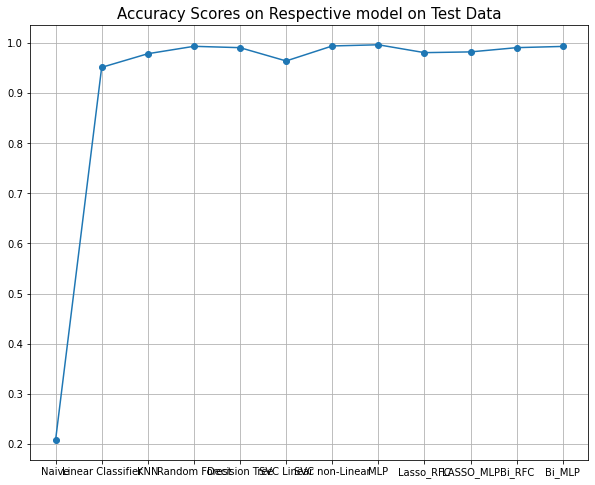

In [116]:
fig = plt.figure(figsize=(10, 8))
plt.plot(models,accuracy, marker='o')
plt.title('Accuracy Scores on Respective model on Test Data', fontsize=15)
plt.grid()
plt.show()

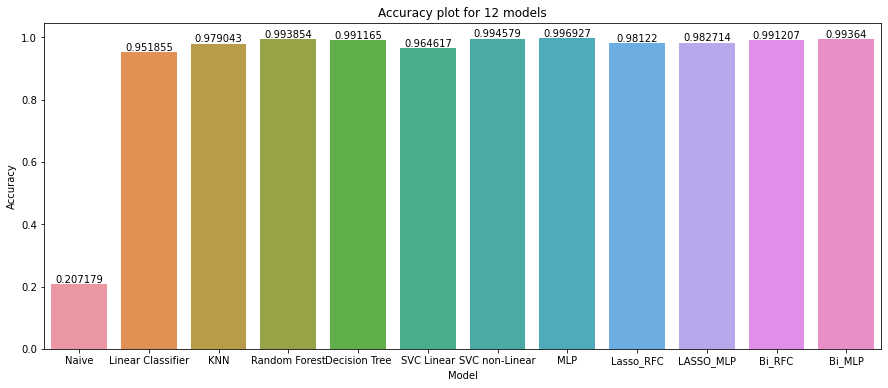

In [118]:
# sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x=models, y=accuracy)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)
plt.xticks(range(len(models)), models)
plt.title(f"Accuracy plot for {len(accuracy)} models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

In [119]:
print(precision,recall,f1_score)

[0.04292319479439372, 0.9527208651383577, 0.979342822026067, 0.9939225445174426, 0.9912345245056244, 0.964696760886239, 0.9945780441228822, 0.9969319045605846, 0.982030954809999, 0.9827534423377533, 0.9913403947273653, 0.993645471282584] [0.2071791369670067, 0.9518545392462333, 0.9790430662853729, 0.9938537709676043, 0.9911647957659311, 0.9646165009176662, 0.9945793674505954, 0.9969268854838021, 0.9812198557343463, 0.9827137308463869, 0.9912074779119894, 0.9936403602373127] [0.07111321506472797, 0.9516723739853756, 0.9790435135124657, 0.9938617877285427, 0.9911741113549136, 0.9644264603618383, 0.9945773787666786, 0.9969284227539928, 0.9812411554414605, 0.982726480165553, 0.9912195390789224, 0.9936421990117902]


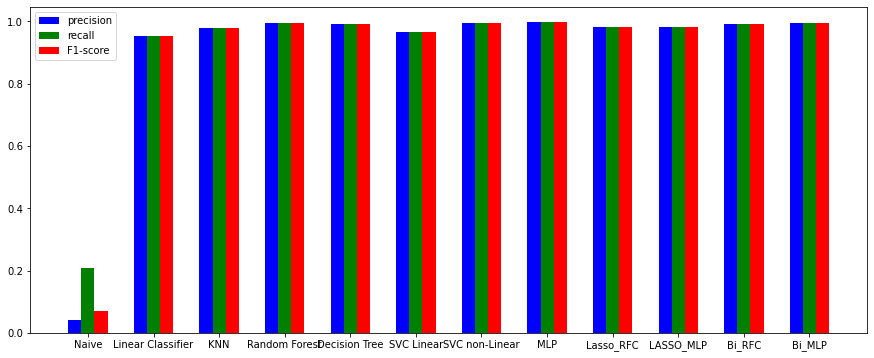

In [121]:
fig, ax = plt.subplots(figsize=(15,6))
x_pos = np.arange(len(accuracy))
bar_width = 0.2
ax.bar(x_pos,precision, width=bar_width, color='b')
ax.bar(x_pos+bar_width, recall, width=bar_width, color='g')
ax.bar(x_pos+2*bar_width, f1_score, width=bar_width, color='r')

ax.set_xticks(x_pos+1*bar_width)
ax.set_xticklabels(models)
ax.legend(['precision','recall','F1-score'])

In [122]:
# Load the results dataframe
final_results = pd.DataFrame({
    'Classifier': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
})

In [123]:
final_results

,Classifier,Accuracy,Precision,Recall,F1-Score
0,Naive,0.207179,0.042923,0.207179,0.071113
1,Linear Classifier,0.951855,0.952721,0.951855,0.951672
2,KNN,0.979043,0.979343,0.979043,0.979044
3,Random Forest,0.993854,0.993923,0.993854,0.993862
4,Decision Tree,0.991165,0.991235,0.991165,0.991174
5,SVC Linear,0.964617,0.964697,0.964617,0.964426
6,SVC non-Linear,0.994579,0.994578,0.994579,0.994577
7,MLP,0.996927,0.996932,0.996927,0.996928
8,Lasso_RFC,0.981220,0.982031,0.981220,0.981241
9,LASSO_MLP,0.982714,0.982753,0.982714,0.982726
